# Kunskapskontroll 3

In [2]:
# Genomgång av dataset ”housing”.
# Frågeställning ### 
#  I denna kunskapskontrollen har du ett dataset som heter "housing".
#  Gör en utforskandeannalys dä dtu  t.ex kan utföra visualiseringar, beräkningar
#  samt bearbeta datan för att se om det exempelvis fins  sakddae  värden i den.
#  Målet är att man ska kunna läsa skriptet och följa din analys av datan.
# Exempelvis: Vlietl huhs är dyrare/billigare? Varför?



In [3]:
# Analys:
# 1.	Ladda in och inspektera data. Försöka förstå struktur och innehåll.
# 2.	Kontrollera om det saknas värden. 
# 3.	Försök göra en statistisk sammanfattning
# 4.	Visualisera på olika sätt
# 5.	Analysera huspriserna och se vilka faktorer som avgör dessa


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data file is in same folder as python code
data = pd.read_csv(r'housing.csv')

# show all columns without any line break
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr',False)


In [5]:
#############
# Analyze 1 #
#############
# check if data is imported correctly
print ("-"*100)
print (data.head()) 
print ("-"*100)
#print (data.info()) 
#print ("-"*100)
print (data.describe())
print ("-"*100)
print ()


----------------------------------------------------------------------------------------------------
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity
0    -122.23     37.88                41.0        880.0           129.0       322.0       126.0         8.3252            452600.0        NEAR BAY
1    -122.22     37.86                21.0       7099.0          1106.0      2401.0      1138.0         8.3014            358500.0        NEAR BAY
2    -122.24     37.85                52.0       1467.0           190.0       496.0       177.0         7.2574            352100.0        NEAR BAY
3    -122.25     37.85                52.0       1274.0           235.0       558.0       219.0         5.6431            341300.0        NEAR BAY
4    -122.25     37.85                52.0       1627.0           280.0       565.0       259.0         3.8462            342200.0        NEAR BAY
-----------------

## Conclusion 1
### All data is imported and we have 10 columns with data. Column 10 should later be removed for this analyze.

In [7]:
#############
# Analyze 2 #
#############
# is any data missing?

missing_values = data.isnull().sum() 
print ("-"*100)
print("Missing values, column wise:\n",missing_values)
print ("-"*100)

# Show total rows
len_before_purge = len(data)
print("Rows before purge:", len_before_purge)
print ("-"*100)

# remove lines with missing data
print ("Purge incomplete data...")
data_bort = data.dropna()
missing_values = data_bort.isnull().sum() 
print("Missing values, column wise:\n",missing_values)
print ("-"*100)

# what is left
len_after_purge=len(data_bort)
print("Rows after purge:", len_after_purge)
print("Rows removed:",len_before_purge-len_after_purge)
print ("-"*100)
print ()

# there are a lot of "median_house_value" with the value 500001.0. They are victims of a value cap. Let's remove them
print ("Filtering values over 500000...")
print ("Rows with incorrect data set:", len(data))
data_clean = data[data['median_house_value'] <=500000]

print ("Number of rows after filter:",len(data_clean))
data = data_clean

print ("-"*100)
print ()

----------------------------------------------------------------------------------------------------
Missing values, column wise:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
----------------------------------------------------------------------------------------------------
Rows before purge: 20640
----------------------------------------------------------------------------------------------------
Purge incomplete data...
Missing values, column wise:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
-------------------------------------------------------------

## Conclusion 2
### There were 207 rows with faulty data that was removed, not to give wrong data to the statistics


In [9]:
#######################
# Analyze 3 ###########
#######################
# Statistical Summary #
#######################
print ("Statistical summary")
print (data.describe())
print ("-"*100)
print ()



Statistical summary
          longitude      latitude  housing_median_age   total_rooms  total_bedrooms    population    households  median_income  median_house_value
count  19675.000000  19675.000000        19675.000000  19675.000000    19475.000000  19675.000000  19675.000000   19675.000000        19675.000000
mean    -119.563192     35.651780           28.386277   2619.763659      539.645751   1440.812198    501.186023       3.676717       192477.921017
std        2.006108      2.149802           12.509113   2181.348207      422.413200   1143.648725    383.264636       1.570272        97711.509613
min     -124.350000     32.540000            1.000000      2.000000        2.000000      3.000000      2.000000       0.499900        14999.000000
25%     -121.760000     33.930000           18.000000   1438.000000      297.000000    796.000000    282.000000       2.526800       116600.000000
50%     -118.500000     34.270000           28.000000   2111.000000      436.000000   1179.000000 

## Conclusion 3
### There is a big difference between the least and most expensive houses.
### The first 75% of the houses has a natural span.


Text(0.5, 1.0, 'Scatter Plot house coordinates (house age)')

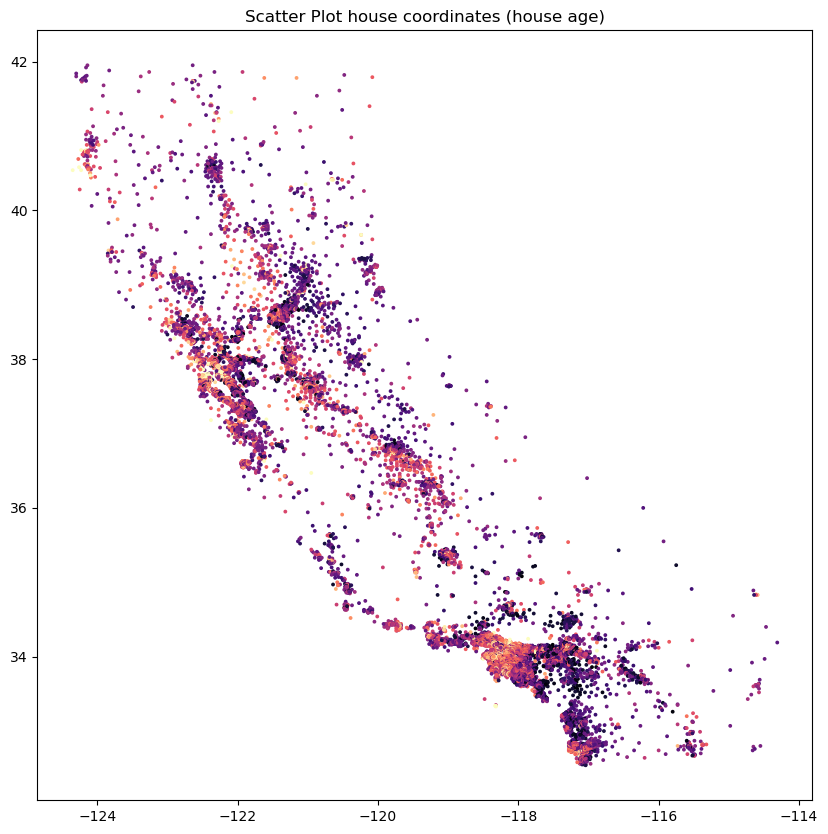

In [11]:
#############
# Analyze 4 #
#############
# create graphical, analyzes

# make a plot with longitude and latitude to get coastline
col_data_long = data['longitude'].tolist()
col_data_lat = data['latitude'].tolist()

# divide age with 10
# age is transformed into a colour (100 years old = 1)
data['housing_median_age']=data['housing_median_age']/10

# put in list
col_data_age = data['housing_median_age'].tolist()

# create figure and axes
# size 10,10 inch
fig, ax = plt.subplots(figsize=(10,10))

# plot "coastline"
# old houses are darker
ax.scatter(col_data_long,col_data_lat,c=col_data_age, cmap='magma', s=3)

# diagram info
ax.set_title('Scatter Plot house coordinates (house age)') 


## This control picture checks if the value actually is predicted by house age
## It's not. The colors show that age are evenly spread all around the area.

Text(0.5, 1.0, 'Scatter Plot house coordinates (house value)')

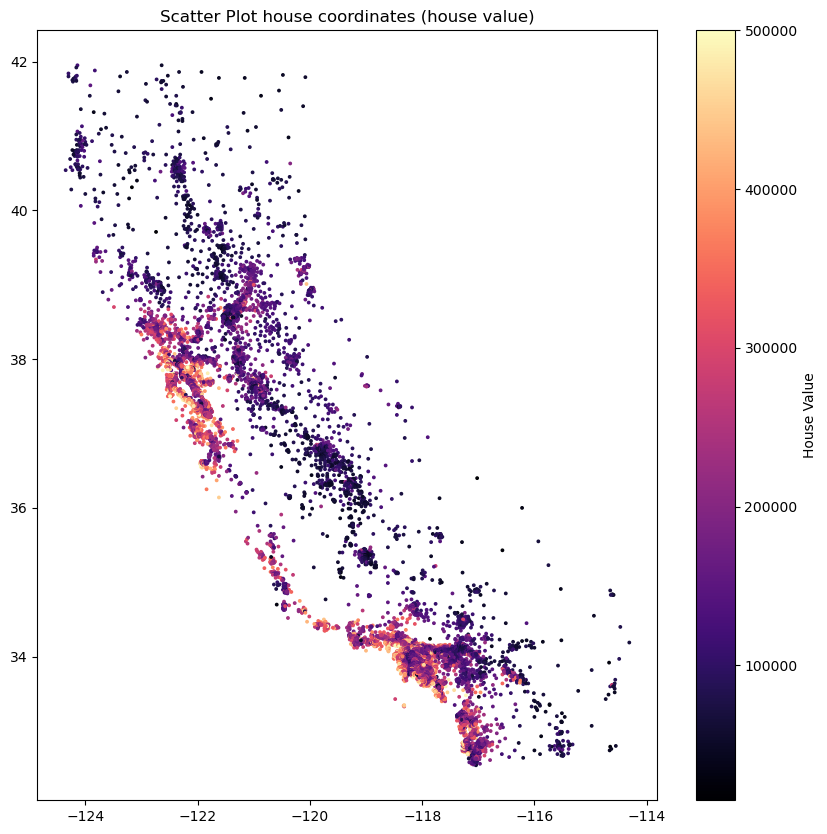

In [12]:
# make a plot with longitude and latitude to get coastline
col_data_value = data['median_house_value'].tolist()

# put in list
col_data_age = data['housing_median_age'].tolist()

# create figure and axes
# size 10,10 inch
fig, ax = plt.subplots(figsize=(10,10))

# plot "coastline"
# cheap houses are darker
scatter = ax.scatter(col_data_long,col_data_lat,c=col_data_value, cmap='magma', s=3)

# Lägg till färgbar till höger 
cbar = plt.colorbar(scatter, ax=ax) 
cbar.set_label('House Value')

# diagram info
ax.set_title('Scatter Plot house coordinates (house value)') 

## The figure above shows that the house value goes up when close to the coast (lower, left corner)
## The big cluster of inexpensive houses are in the centre of the graph.

Text(0, 0.5, 'Quantity')

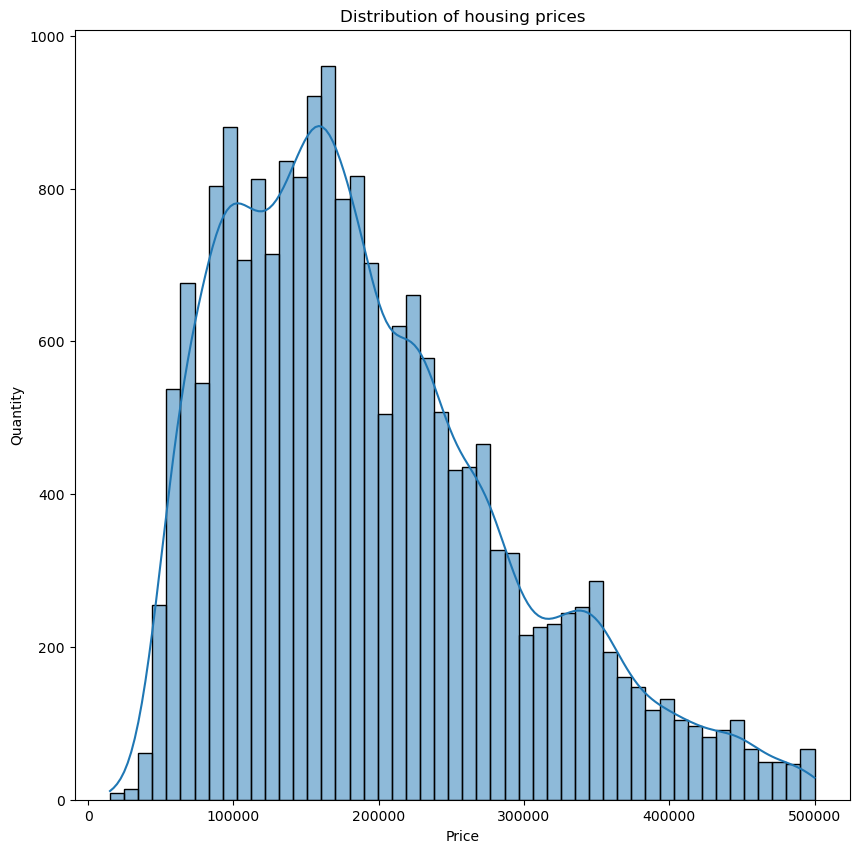

In [14]:
# diagram, house prices
plt.figure(figsize=(10, 10)) 
sns.histplot(data['median_house_value'], bins=50, kde=True) 
plt.title('Distribution of housing prices') 
plt.xlabel('Price') 
plt.ylabel('Quantity')


## The graph shows that most of the houses are somewhere between 80K and 230K. 
## Very few houses are more expensive than 400K.

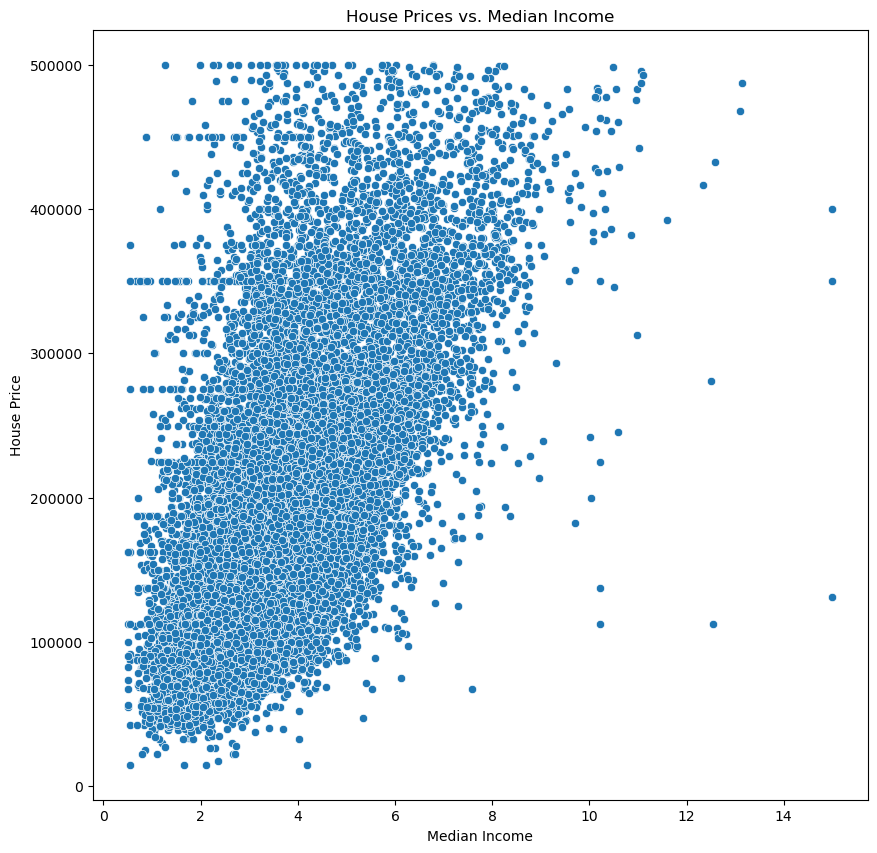

In [16]:
# scatter plot of house prices
plt.figure(figsize=(10,10))
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title ("House Prices vs. Median Income")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.show()

## The trend is quite clear - house prices follow income. 
## There are a few exceptions. Could be wrong data as well.

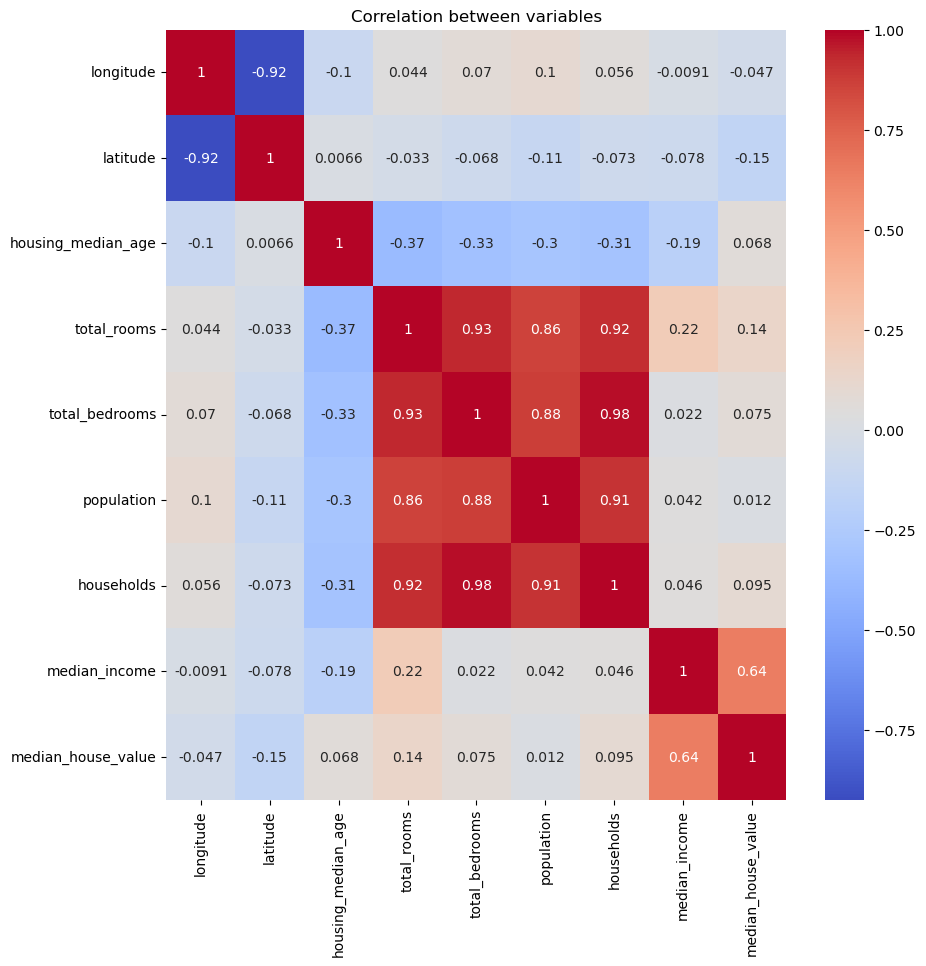

In [18]:
# correlation between variables

# exclude non numeric columns
num_data = data.select_dtypes(include=[float, int])
data = num_data

plt.figure(figsize=(10, 10)) 
correlation_matrix = data.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title("Correlation between variables")
plt.show()

## The correlation beween house location and value are what strikes most. Almost 1.
## Another correlation is house value and income with 0.64 in correlation. 
## No other correlation is close.


Mean Squared Error: 3777460263.1377187
R^2 Score: 0.6031831640432965
                     Coefficient
longitude          -39640.073132
latitude           -38828.227884
housing_median_age   1011.746543
total_rooms           -10.145703
total_bedrooms        109.677428
population            -30.981101
households             42.099893
median_income       39940.564763
--------------------------------------------------



([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'longitude'),
  Text(1, 0, 'latitude'),
  Text(2, 0, 'housing_median_age'),
  Text(3, 0, 'total_rooms'),
  Text(4, 0, 'total_bedrooms'),
  Text(5, 0, 'population'),
  Text(6, 0, 'households'),
  Text(7, 0, 'median_income')])

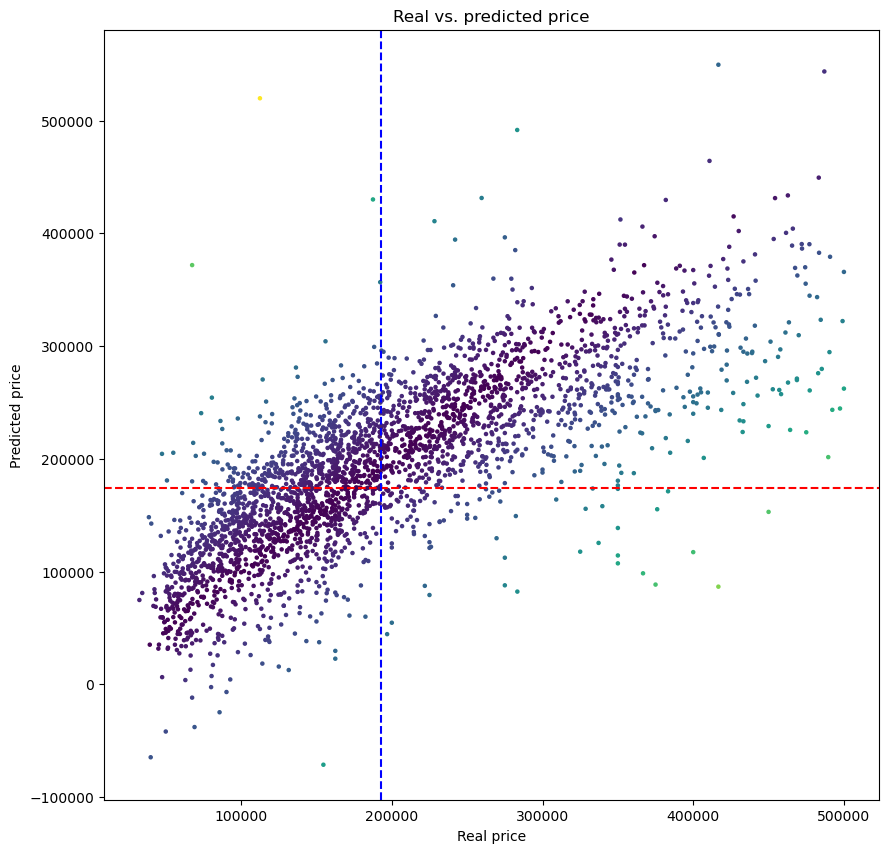

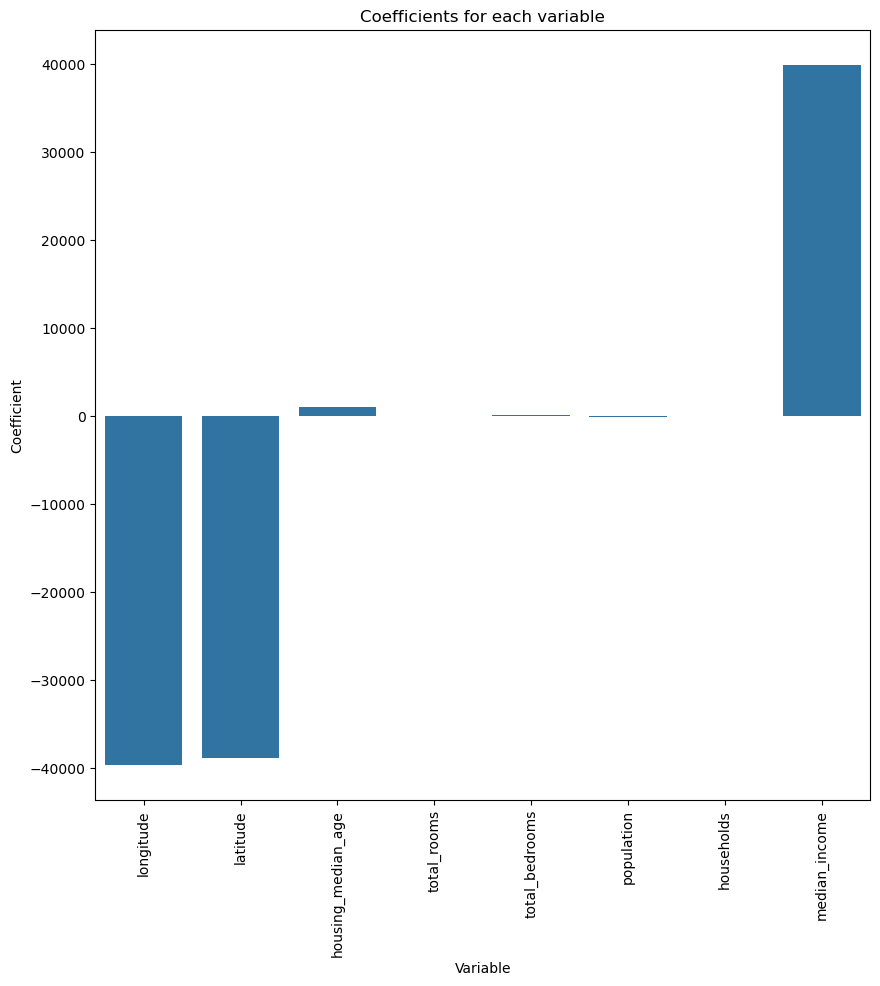

In [40]:
#############
# Analyze 5 #
#############

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data file is in same folder as python code
data = pd.read_csv(r'housing.csv')

# remove lines with empty data
data_clean = data.dropna()

# Select only numeric columns 
data = data_clean.select_dtypes(include=[np.number])

# remove cap data above 500000
data_clean = data[data['median_house_value'] <=500000]
data = data_clean

# start learning process
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

# split set into training- and test set
x = data.drop('median_house_value', axis=1)
y = data['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# is any data missing?
if x_train.isnull().sum().any(): 
    raise ValueError("Missing values in x_train.")

# train model 
model = LinearRegression() 
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)

# evaluate model 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
print(f'Mean Squared Error: {mse}') 
print(f'R^2 Score: {r2}')

# analyze result: show coefficients for each variable
coefficients = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient']) 
print (coefficients)
print ("-"*50)
print ()

# predicted price vs. real price comparison
plt.figure(figsize=(10, 10)) 

# medians
median_real_price = np.median(y_test) 
median_predicted_price = np.median(y_pred)

# skapa färg för avvikelsen
c_hyp= np.abs(y_test - y_pred)

# horisontal median line, real prices
plt.axhline(y=median_real_price, color='r', linestyle='--', label=f'Median Real Price: {median_real_price:.2f}')

# vertikal median line, predicted prices
plt.axvline(x=median_predicted_price, color='b', linestyle='--', label=f'Median Predicted Price: {median_predicted_price:.2f}')

plt.scatter(y_test, y_pred,5, c=c_hyp)
plt.xlabel('Real price') 
plt.ylabel('Predicted price') 
plt.title('Real vs. predicted price')

# Bar Plot av Koefficienter 
plt.figure(figsize=(10, 10)) 
sns.barplot(x=coefficients.index, y='Coefficient', data=coefficients) 
plt.title('Coefficients for each variable') 
plt.xlabel('Variable') 
plt.ylabel('Coefficient') 
plt.xticks(rotation=90)


## 5 conclusion
### Starting with a color map showing that the prices are higher close to the water, made this easier to know where to start.
### From this data it's easy to see that the house prices are dependent on how close to the water they are.
### Another coefficient shows that people buying these houses have a high income.
### Coefficients also show that "median income" and "near water" are related. Muchos dinares = Morning swim.

## Q1 - Has something been challenging in this knowledge check
### Yes, it's been a bit hard understanding all the classes, how to use them and understand them. A lot of trial and error and a lot of reading finally made it work.
### Hopefully this will be repeated in future lessons so it will feel more natural and explainatory to use. There seems to be a huge backbone of instructions and it will
### probably take months just to go through them. Years to understand fully.

## Q2 - What grade do you think you should have and why.
### It's a bit hard knowing what you don't know, but I probably could've been more AI-biased in my analyzis. I probably have been more "statistic" above anything else.
### Hopefully I will learn this in the next weeks to come. At this point I believe my level is 'G'.

## Q3
### Not at this point


In [22]:
# complete